# MagSim – Magnetic Simulations

Code under GNU General Public License v3 (see `LICENSE` file).<br>
Contact: A. Coulon <antoine.coulon@curie.fr> – Institut Curie, CNRS. 2021


In [1]:
from scipy import *
from matplotlib import pyplot as plt, cm

import sys
sys.path.append('../../')

import MagSim as ms

Below are a list of examples. Each section can be run independently.

## Single dipole

In [2]:
model=ms.Model(T=273.15+  ( 28.    ),  # Temprature (in K)
               magSatMNP= ( 3e-20  ))  # Magentic moment of MNPs at saturation (in A.m^2)

model.permDipoles.append((r_[0,0,0],         # Position (z,y,x in meters)
                          r_[1,0,0]*1e-10)); # Magnetic moment (z,y,x in A.m^2)



========= Lateral view (dipole pointing up) =========


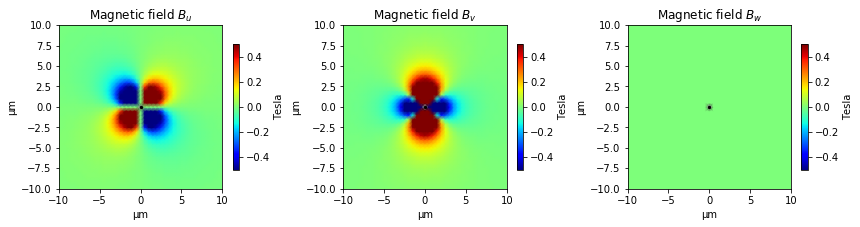

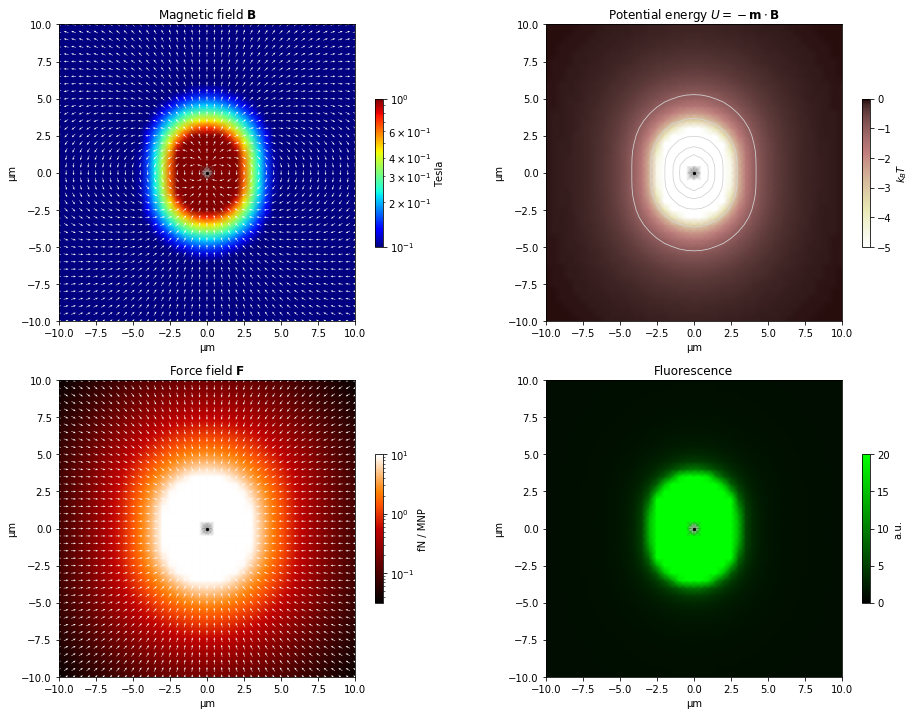

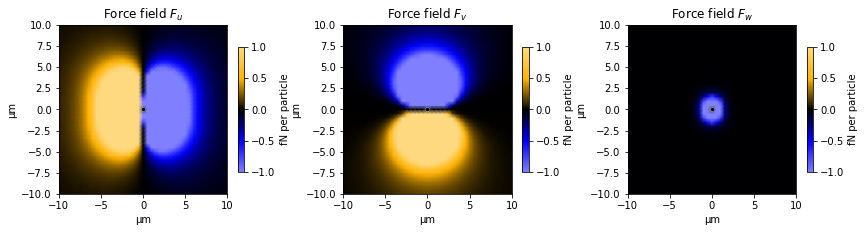


========= Axial views (sections along the diplole axis) =========
z: -2 µm


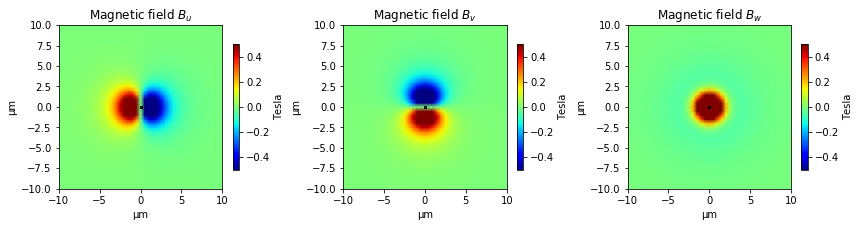

z: 0 µm


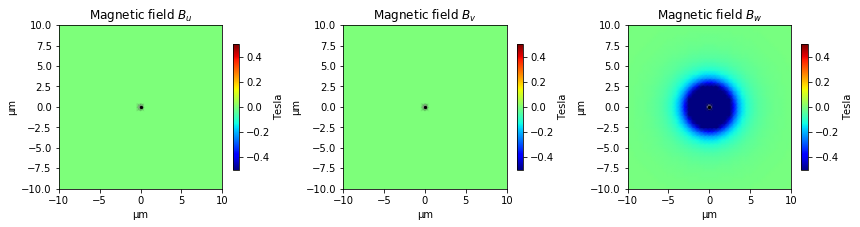

z: 2 µm


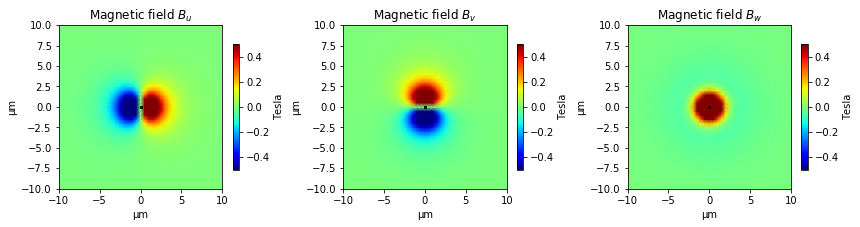

In [4]:
print("\n========= Lateral view (dipole pointing up) =========")
laterView=model.calcFieldsInView(orig=r_[0,0,0], u=r_[0,0,1], v=r_[1,0,0],
                                uStep=.5e-6, vStep=.5e-6,
                                uRange=(-20,21), vRange=(-20,21))
laterView.show_B_components()
laterView.show(U_contours=[-100,-30,-10,-3,-1])
laterView.show_F_components()

print("\n========= Axial views (sections along the diplole axis) =========")
print("z: -2 µm")
axialView_m2=model.calcFieldsInView(orig=r_[-2,0,0]*1e-6, u=r_[0,0,1], v=r_[0,1,0], uStep=.5e-6, vStep=.5e-6, uRange=(-20,21), vRange=(-20,21))
axialView_m2.show_B_components()
print("z: 0 µm")
axialView_0=model.calcFieldsInView(orig=r_[0,0,0]*1e-6, u=r_[0,0,1], v=r_[0,1,0], uStep=.5e-6, vStep=.5e-6, uRange=(-20,21), vRange=(-20,21))
axialView_0.show_B_components()
print("z: 2 µm")
axialView_2=model.calcFieldsInView(orig=r_[2,0,0]*1e-6, u=r_[0,0,1], v=r_[0,1,0], uStep=.5e-6, vStep=.5e-6, uRange=(-20,21), vRange=(-20,21))
axialView_2.show_B_components()


-----

# Two dipoles


========= Side by side, parallel =========
d: 4 µm


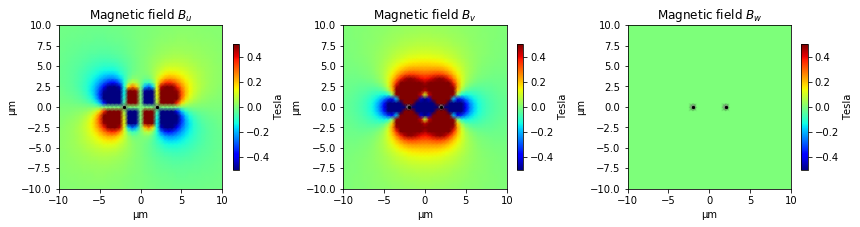


========= Side by side, anti-parallel =========
d: 4 µm


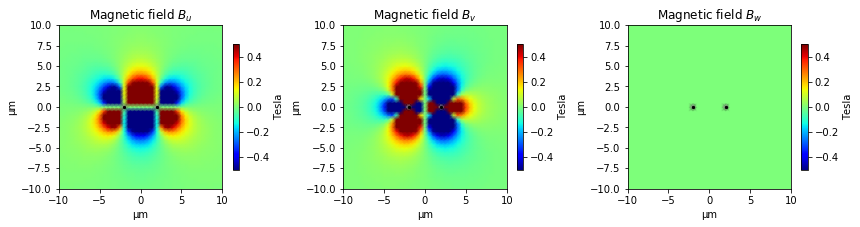


========= Colinear, parallel =========
d: 4 µm


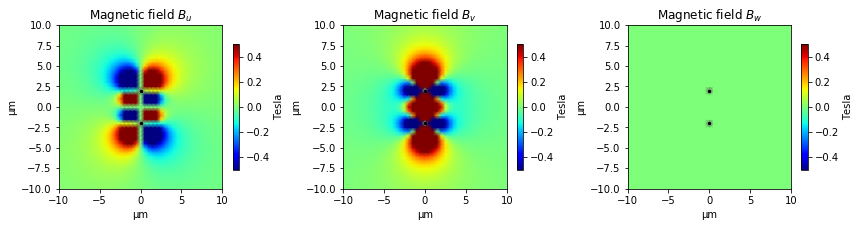


========= Colinear, anti-parallel =========
d: 4 µm


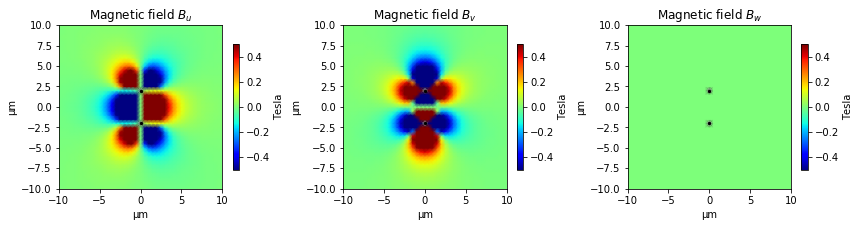

In [6]:
print("\n========= Side by side, parallel =========")
print("d: 4 µm")
model=ms.Model(T=273.15+( 28. ),magSatMNP=( 3e-20 ))
model.permDipoles.append((r_[0,0,-2]*1e-6,r_[ 1,0,0]*1e-10));
model.permDipoles.append((r_[0,0, 2]*1e-6,r_[ 1,0,0]*1e-10));
view=model.calcFieldsInView(orig=r_[0,0,0], u=r_[0,0,1], v=r_[1,0,0], uStep=.5e-6, vStep=.5e-6, uRange=(-20,21), vRange=(-20,21))
view.show_B_components()

print("\n========= Side by side, anti-parallel =========")
print("d: 4 µm")
model=ms.Model(T=273.15+( 28. ),magSatMNP=( 3e-20 ))
model.permDipoles.append((r_[0,0,-2]*1e-6,r_[ 1,0,0]*1e-10));
model.permDipoles.append((r_[0,0, 2]*1e-6,r_[-1,0,0]*1e-10));
view=model.calcFieldsInView(orig=r_[0,0,0], u=r_[0,0,1], v=r_[1,0,0], uStep=.5e-6, vStep=.5e-6, uRange=(-20,21), vRange=(-20,21))
view.show_B_components()

print("\n========= Colinear, parallel =========")
print("d: 4 µm")
model=ms.Model(T=273.15+( 28. ),magSatMNP=( 3e-20 ))
model.permDipoles.append((r_[-2,0,0]*1e-6,r_[ 1,0,0]*1e-10));
model.permDipoles.append((r_[ 2,0,0]*1e-6,r_[ 1,0,0]*1e-10));
view=model.calcFieldsInView(orig=r_[0,0,0], u=r_[0,0,1], v=r_[1,0,0], uStep=.5e-6, vStep=.5e-6, uRange=(-20,21), vRange=(-20,21))
view.show_B_components()

print("\n========= Colinear, anti-parallel =========")
print("d: 4 µm")
model=ms.Model(T=273.15+( 28. ),magSatMNP=( 3e-20 ))
model.permDipoles.append((r_[-2,0,0]*1e-6,r_[ 1,0,0]*1e-10));
model.permDipoles.append((r_[ 2,0,0]*1e-6,r_[-1,0,0]*1e-10));
view=model.calcFieldsInView(orig=r_[0,0,0], u=r_[0,0,1], v=r_[1,0,0], uStep=.5e-6, vStep=.5e-6, uRange=(-20,21), vRange=(-20,21))
view.show_B_components()


----

# Bar of 50x10x10µm


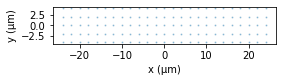

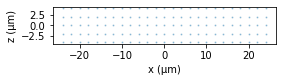

Total number of dipoles: 625


In [7]:
model=ms.Model(T=273.15+( 28. ),magSatMNP=( 3e-20 ))
model.addBlock(orig=r_[-5,-5,-25]*1e-6, size=r_[10,10,50]*1e-6, M=r_[0,0,1]*5e6, nbDipoles=r_[10,10,50]/2);

model.plotDipoleMap()


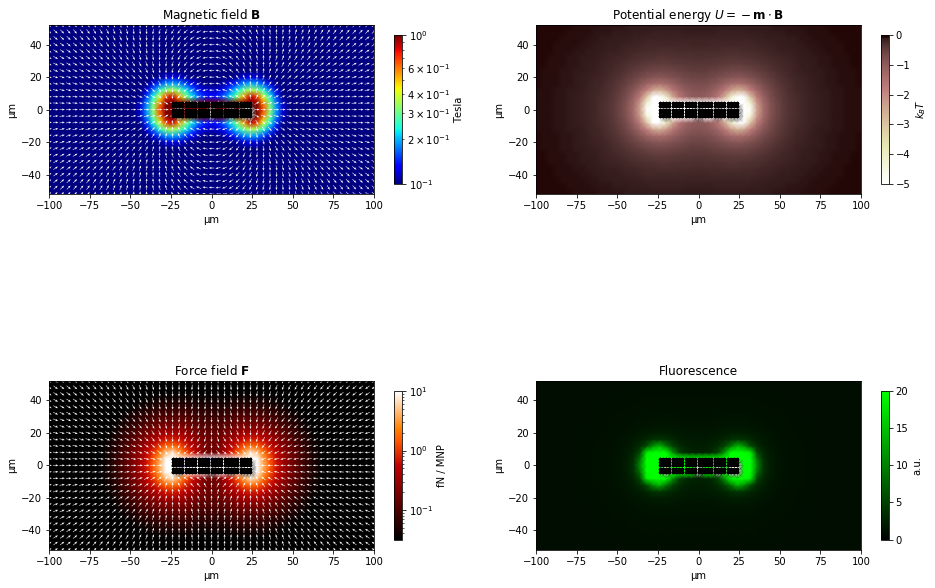

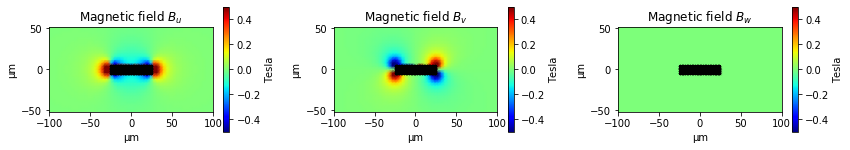

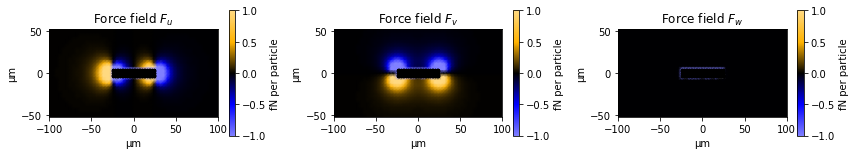

In [8]:
lateralView=model.calcFieldsInView(orig=r_[0,0,0]*1e-6, u=r_[0,0,1], v=r_[0,1,0],
                                uStep=4.e-6, vStep=4e-6, uRange=(-25,26), vRange=(-13,14))
lateralView.show()
lateralView.show_B_components()
lateralView.show_F_components()


-----

## Two bars of 20x10x10µm

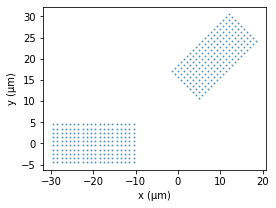

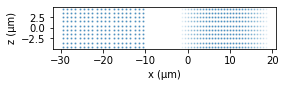

Total number of dipoles: 4000


In [9]:
model=ms.Model(T=273.15+( 28. ),magSatMNP=( 3e-20 ))
model.addBlock(orig=r_[-5,-5,-30]*1e-6, size=r_[10,10,20]*1e-6, M=r_[0,0,1]*2e6, nbDipoles=r_[10,10,20]);
model.addBlock(orig=r_[-5,10, 5]*1e-6, size=r_[10,10,20]*1e-6, M=r_[0,1,1]/2**.5*2e6, nbDipoles=r_[10,10,20],
               yxOrient=array([[0,1,-1],[0,1,1]]));

model.plotDipoleMap()


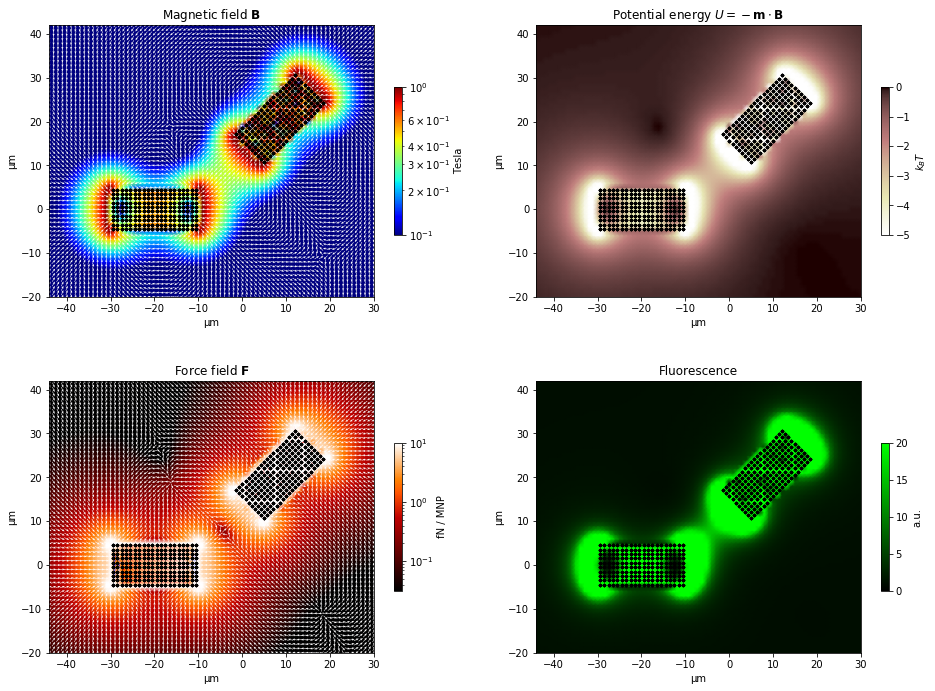

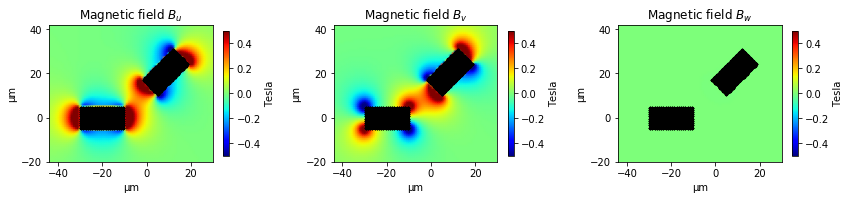

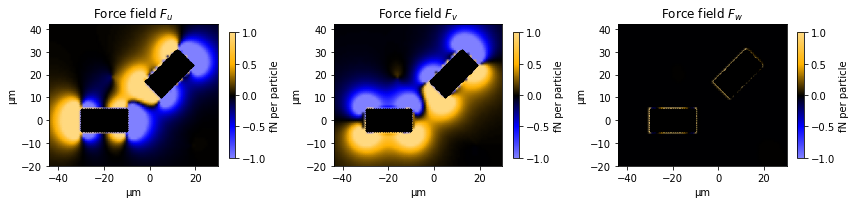

In [10]:
view=model.calcFieldsInView(orig=r_[0,0,0]*1e-6, u=r_[0,0,1], v=r_[0,1,0],
                            uStep=1.e-6, vStep=1.e-6, uRange=(-44,31), vRange=(-20,43))
view.show()
view.show_B_components()
view.show_F_components()
